# 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#그래프를 그리기 위한 기본 설정
#폰트 설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
#그래프의 크기
plt.rcParams['figure.figsize'] = 18, 9
#글자 크기
plt.rcParams['font.size'] = 14
#폰트 설정 시 - 기호 깨지는 것 방지하기
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.facecolor'] = 'white'

In [6]:
print('[df_sample 정보]\n')
with open('./data/sample.csv') as f:
    table = pd.read_csv(f) 
df_sample = pd.DataFrame(table)
df_sample = df_sample.fillna(0)
df_sample = df_sample.drop(['Unnamed: 0'], axis=1)
print(df_sample.info(),'\n')
display(df_sample.describe())

[df_sample 정보]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mid3    1288 non-null   float64
 1   ele     1288 non-null   float64
 2   high1   1288 non-null   float64
 3   mid1    1288 non-null   float64
 4   mid2    1288 non-null   float64
 5   high2   1288 non-null   float64
 6   high3   1288 non-null   float64
dtypes: float64(7)
memory usage: 70.6 KB
None 



,mid3,ele,high1,mid1,mid2,high2,high3
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,0.032921,0.416701,0.036587,0.369761,0.113656,0.024304,0.006071
std,0.022501,0.050605,0.028695,0.055875,0.040214,0.021858,0.012233
min,0.000000,0.233333,0.000000,0.184615,0.006173,0.000000,0.000000
25%,0.017217,0.382353,0.012987,0.333333,0.088760,0.007463,0.000000
50%,0.029798,0.418493,0.033180,0.368750,0.111539,0.018832,0.000000
75%,0.043136,0.453025,0.053071,0.404507,0.136188,0.035971,0.007634
max,0.175824,0.559767,0.177215,0.598765,0.290909,0.183333,0.093023


In [12]:
display(df_sample.head(1)) # 데이터 확인, 문단 속 난이도 분포
print(df_sample.isna().sum()) # 결측치 확인

,ele,mid1,mid2,mid3,high1,high2,high3
0,0.423423,0.396396,0.081081,0.036036,0.027027,0.027027,0.009009


ele      0
mid1     0
mid2     0
mid3     0
high1    0
high2    0
high3    0
dtype: int64


---
- 컬럼 순서 변경

In [13]:
df_sample.columns

df_sample = df_sample[['ele', 'mid1', 'mid2', 'mid3', 'high1', 'high2', 'high3']]

---
- 데이터 평균 분포 확인
- 데이터 boxplot, hist, kde 분포 확인

In [24]:
df_sample[['ele', 'mid1', 'mid2', 'mid3', 'high1', 'high2', 'high3']].mean()

ele      0.416701
mid1     0.369761
mid2     0.113656
mid3     0.032921
high1    0.036587
high2    0.024304
high3    0.006071
dtype: float64

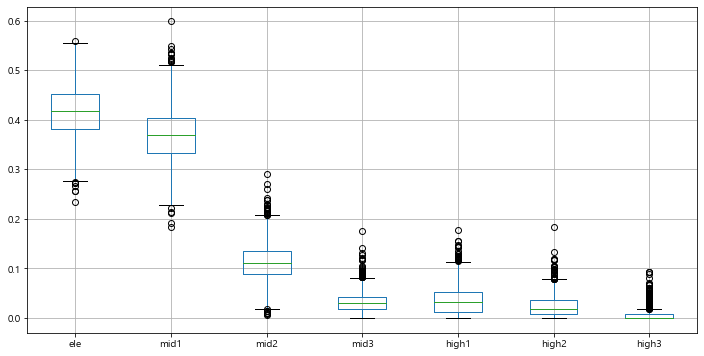

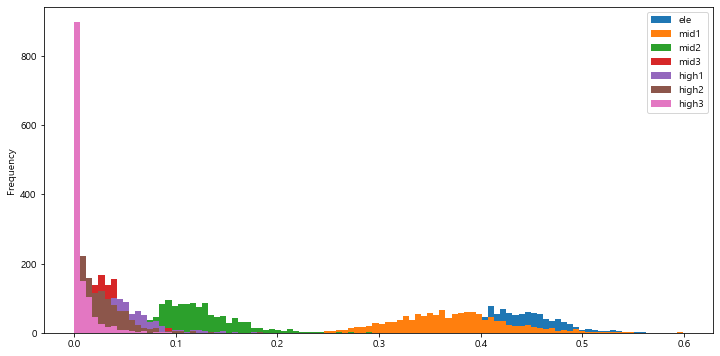

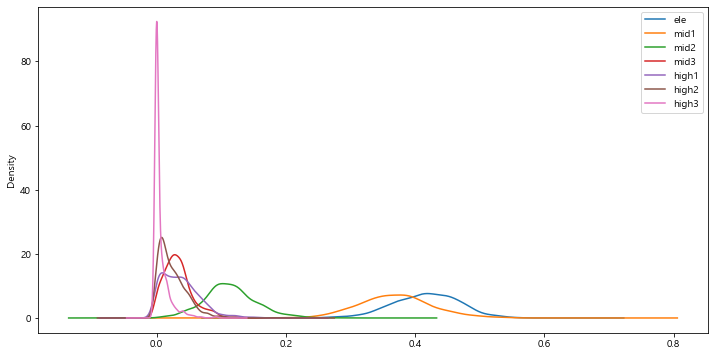

In [25]:
df_sample.boxplot(figsize=(12,6))
plt.show()
df_sample.plot.hist(bins=100,figsize=(12,6))
df_sample.plot.kde(figsize=(12,6))
plt.show()

> ele, mid1은 제거하고 모델 돌려볼 필요가 있음.(어느 문장에서도 많은 빈도수로 쓰이기 때문에  TF-IDF 대신 진행)     
> mid3 부터 급격히 낮아짐   
---

In [26]:
#texts 


# 모의고사
print('\n df_contents_1 모의고사 info\n')
with open('./data/mouitest_list.csv', encoding='utf-8') as f: #  모의고사
    table = pd.read_csv(f, header=0) 
df_contents_1 = pd.DataFrame(table) 
# print(df_contents_1.info(1))
df_contents_1 = df_contents_1.drop(['Unnamed: 4'], axis=1) # column drop
df_contents_1 = df_contents_1.dropna(axis=0) #  결측치 제거
# print(df_contents_1.info(1))
df_contents_1['video_id'] = df_contents_1['video_id'].astype('object') #   컬럼 타입 변경 int64 -> object
df_contents_1['order'] = df_contents_1['order'].astype('object') #  컬럼 타입 변경 int64 -> object
print(df_contents_1.info(1))


# 교재
print('\n df_contents_2 교재 info\n')
with open('./data/textbook_list.csv', encoding='utf-8') as f: # 교재
    table = pd.read_csv(f, header=0)
df_contents_2 = pd.DataFrame(table)
# print(df_contents_2.info(1))
df_contents_2 = df_contents_2.drop(['Unnamed: 4'], axis=1) # 컬럼 drop
df_contents_2 = df_contents_2.dropna(axis=0) #  결측치 제거
# print(df_contents_2.info(1)) 
df_contents_2['video_id'] = df_contents_2['video_id'].astype('object')
df_contents_2['order'] = df_contents_2['order'].astype('object')
print(df_contents_2.info(1))

print('\n df_contents 모의고사 문제 지문\n')
df_contents = df_contents_1.groupby(['video_id','title'])['sentence'].apply(' '.join).reset_index()
print(df_contents['sentence'][0])
display(df_contents.head(2))

print('\n df_contents_txt 교재 문제 지문\n')
df_contents_txt = df_contents_2.groupby(['video_id','title'])['sentence'].apply(' '.join).reset_index()
print(df_contents_txt['sentence'][0])
display(df_contents_txt.head(2))



 df_contents_1 모의고사 info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1839 entries, 0 to 1846
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1839 non-null   object
 1   order     1839 non-null   object
 2   video_id  1839 non-null   object
 3   title     1839 non-null   object
dtypes: object(4)
memory usage: 71.8+ KB
None

 df_contents_2 교재 info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32874 entries, 0 to 32956
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  32874 non-null  object
 1   order     32874 non-null  object
 2   video_id  32874 non-null  object
 3   title     32874 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB
None

 df_contents 모의고사 문제 지문

Dear Mr. Spencer, I will have lived in this apartment for ten years as of this coming April. I have enjoyed living here and hope to continue doing so. When I fir

,video_id,title,sentence
0,127765,2019학년도 고2 3월 모의고사 18번,"Dear Mr. Spencer, I will have lived in this ap..."
1,127766,2019학년도 고2 3월 모의고사 19번,Something inside told me that by now someone h...



 df_contents_txt 교재 문제 지문

Dear Mr.Kayne, I am a resident of Cansinghill Apartments, located right next to the newly opened  Vuenna Dog Park. As I live with three dogs, I am very happy to let my dogs run  around and safely play with other dogs from the neighborhood. However, the noise of  barking and yelling from the park at night is so loud and disturbing that I cannot relax  in my apartment. Many of my apartment neighbors also seriously complain about this  noise. I want immediate action to solve this urgent problem. Since you are the manager  of Vuenna Dog Park, I ask you to take measures to prevent the noise at night. I hope to  hear from you soon.


,video_id,title,sentence
0,26657,수능특강 1 - Gateway,"Dear Mr.Kayne, I am a resident of Cansinghill ..."
1,26658,수능특강 1 - 1,Can’t leave the office or home to volunteer? N...


---
# data columns 정리
[df_contents_1 모의고사 문장, df_contents_2. 교재 문장]     
[df_contents. 모의고사 지문, df_contents_txt 교재 지문] 
>    `sentence` :  지문   
    `order` :  index + 1    
    `video_id` : 지문 id    
    `title` : 출처(년/학년/월/번호)     


In [28]:
display('sample',df_sample.head(1))

display('df_contents_1',df_contents_1.head(1))
display('df_contents_2',df_contents_2.head(1))
display('df_contents',df_contents.head(1))
display('df_contents_txt',df_contents_txt.head(1))

'sample'

,ele,mid1,mid2,mid3,high1,high2,high3
0,0.423423,0.396396,0.081081,0.036036,0.027027,0.027027,0.009009


'df_contents_1'

,sentence,order,video_id,title
0,"Dear Mr. Spencer,",1,127765,2019학년도 고2 3월 모의고사 18번


'df_contents_2'

,sentence,order,video_id,title
0,"Dear Mr.Kayne, I am a resident of Cansinghill ...",1,26657,수능특강 1 - Gateway


'df_contents'

,video_id,title,sentence
0,127765,2019학년도 고2 3월 모의고사 18번,"Dear Mr. Spencer, I will have lived in this ap..."


'df_contents_txt'

,video_id,title,sentence
0,26657,수능특강 1 - Gateway,"Dear Mr.Kayne, I am a resident of Cansinghill ..."


In [30]:
df_contents_txt['level'] = ['H3' if '수능특강' in x 
                            else 'H3' if '고3' in x
                            else 'H3' if '수능' in x
                            else 'H2' if '고2' in x 
                            else 'H1' if '고1' in x
                            else 'M3' if '중등3' in x
                            else 'M2' if 'NE능률(김)' in x
                            else 'M2' if '중등2' in x
                            else 'M1' if '중등1' in x
                            else 'H1' if '고등' in x
                            else 'H1' if 'YBM(박)' in x
                            else 'M1' if '중등' in x
                            else 'non-labeled' for x in df_contents_txt['title']]

from collections import Counter
print(Counter(df_contents_txt['level']),'\n')
# print(df_contents_txt.loc[df_contents_txt['level']=='non-labeled'])
print(df_contents_txt.info(1))

Counter({'H3': 488, 'H1': 256, 'H2': 200, 'M2': 141, 'M3': 103, 'M1': 100}) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  1288 non-null   int64 
 1   title     1288 non-null   object
 2   sentence  1288 non-null   object
 3   level     1288 non-null   object
dtypes: int64(1), object(3)
memory usage: 40.4+ KB
None


In [31]:
df = df_contents_txt.merge(df_sample, left_index=True, right_index=True)
print(df.info(0))
display(df.head(2))
# df.to_csv('./1288_contents_total.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   video_id  1288 non-null   int64  
 1   title     1288 non-null   object 
 2   sentence  1288 non-null   object 
 3   level     1288 non-null   object 
 4   ele       1288 non-null   float64
 5   mid1      1288 non-null   float64
 6   mid2      1288 non-null   float64
 7   mid3      1288 non-null   float64
 8   high1     1288 non-null   float64
 9   high2     1288 non-null   float64
 10  high3     1288 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 110.8+ KB
None


,video_id,title,sentence,level,ele,mid1,mid2,mid3,high1,high2,high3
0,26657,수능특강 1 - Gateway,"Dear Mr.Kayne, I am a resident of Cansinghill ...",H3,0.423423,0.396396,0.081081,0.036036,0.027027,0.027027,0.009009
1,26658,수능특강 1 - 1,Can’t leave the office or home to volunteer? N...,H3,0.424242,0.339394,0.157576,0.036364,0.018182,0.012121,0.012121


In [32]:
df.isna().sum()

video_id    0
title       0
sentence    0
level       0
ele         0
mid1        0
mid2        0
mid3        0
high1       0
high2       0
high3       0
dtype: int64

---
# df : 1288 contents_total columns 정리

>    `video_id` : 지문 id    
>    `title` : 출처(년/학년/월/번호)     
>    `sentence` :  지문   
>    `level` : 지문 난이도    
    `left columns` : 난이도 %